<a href="https://colab.research.google.com/github/seshadrite/aimlexercises/blob/main/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Grouped means by loan (0=no default, 1=default):
       Age  AnnualIncome(lakhs)  CreditScore(300-900)  LoanAmount(lakhs)  \
loan                                                                       
0     31.4                  7.2                 722.0                5.4   
1     48.0                 13.4                 650.0               11.0   

      LoanTerm(years)  EmploymentType  
loan                                   
0                 5.8             0.0  
1                12.4             0.8  

Counts by loan class:
loan
0    5
1    5
Name: count, dtype: int64


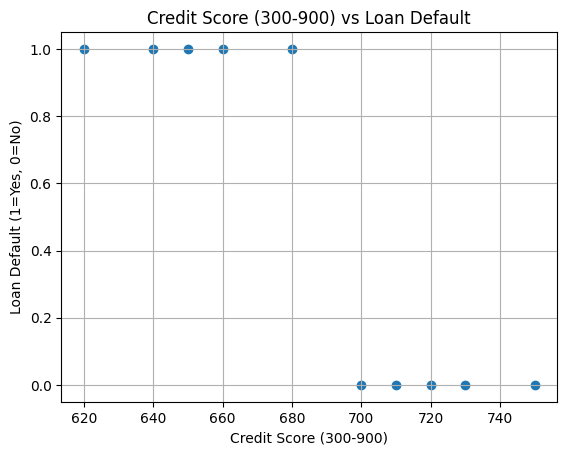

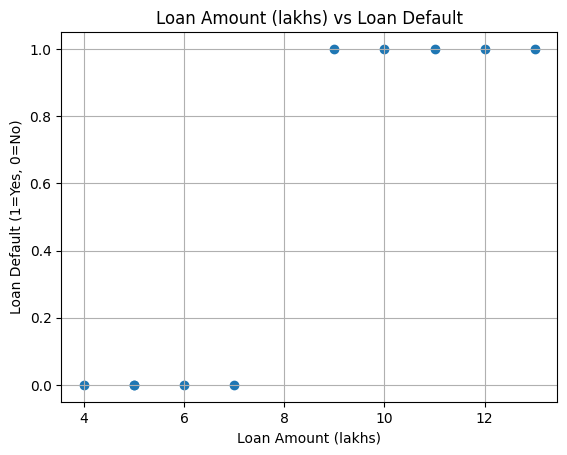

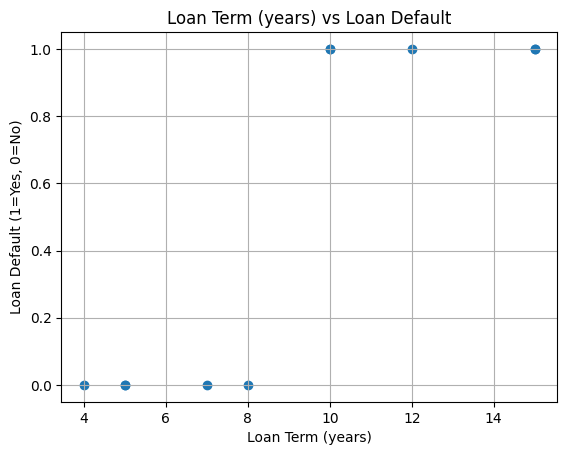

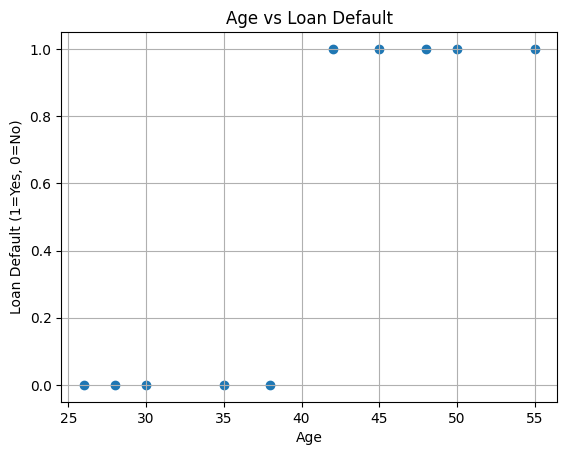

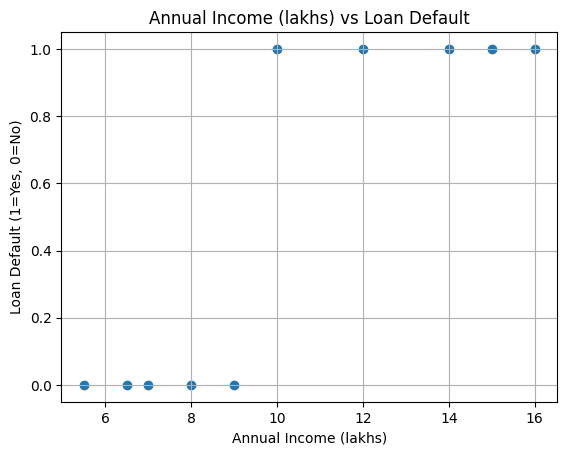

/tmp/ipython-input-1123077315.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])


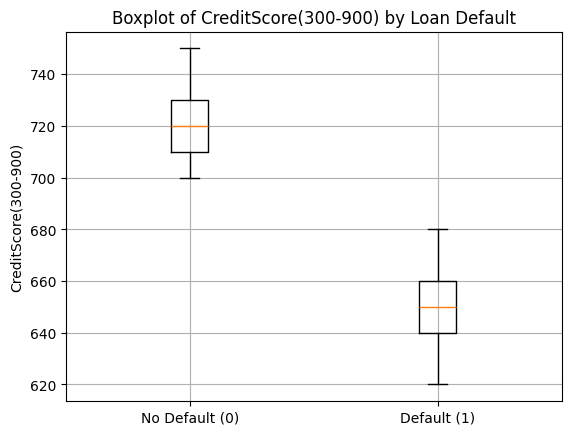

/tmp/ipython-input-1123077315.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])


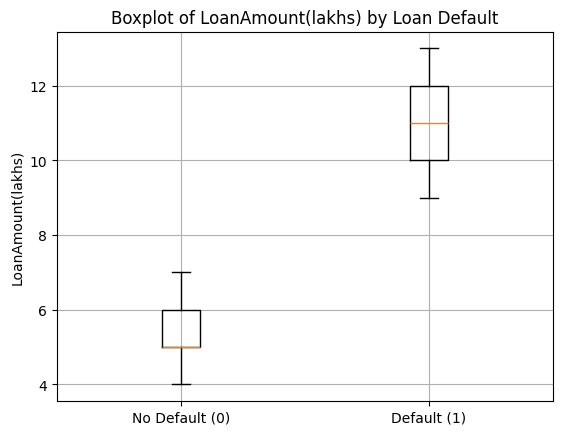

/tmp/ipython-input-1123077315.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])


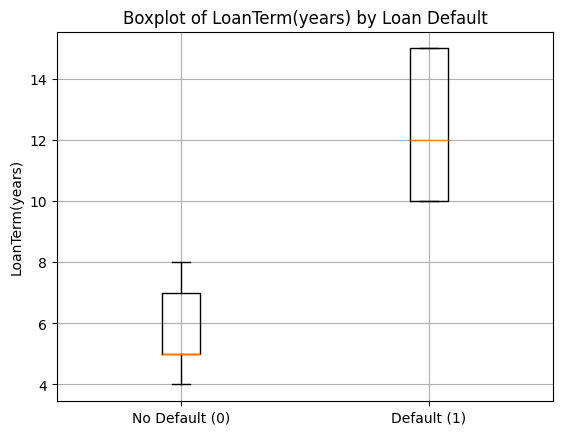

/tmp/ipython-input-1123077315.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])


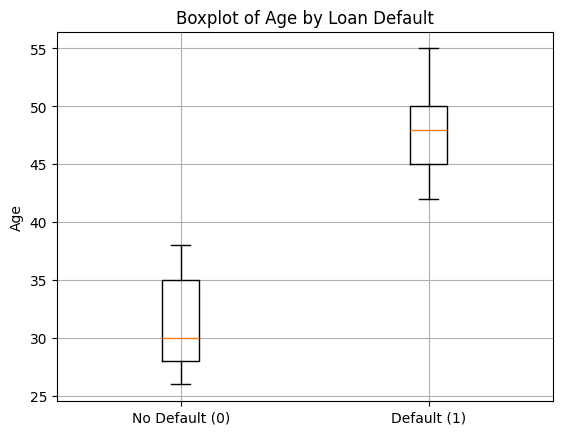

/tmp/ipython-input-1123077315.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])


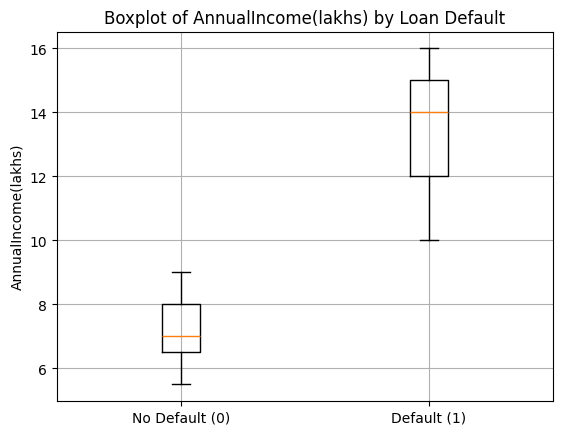

<Figure size 640x480 with 0 Axes>

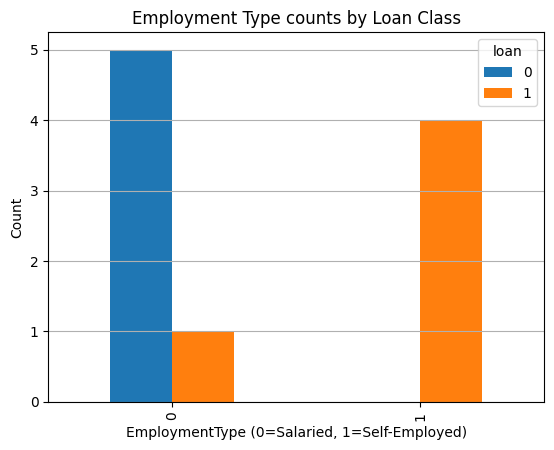

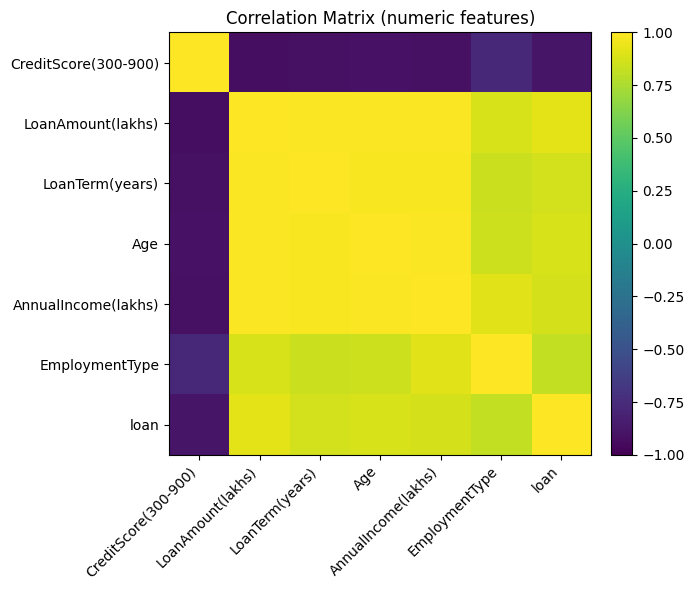


Correlation with target (loan):
loan                    1.000
LoanAmount(lakhs)       0.915
Age                     0.882
AnnualIncome(lakhs)     0.871
LoanTerm(years)         0.867
EmploymentType          0.816
CreditScore(300-900)   -0.888
Name: loan, dtype: float64
KNN (k=3) Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

  High Risk Category
  Predicted loan(default=1): 1
  Probabilities [P(0), P(1)]: [0. 1.]
  Medium Risk Category
  Predicted loan(default=1): 0
  Probabilities [P(0), P(1)]: [1. 0.]

===== KNN =====
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   su

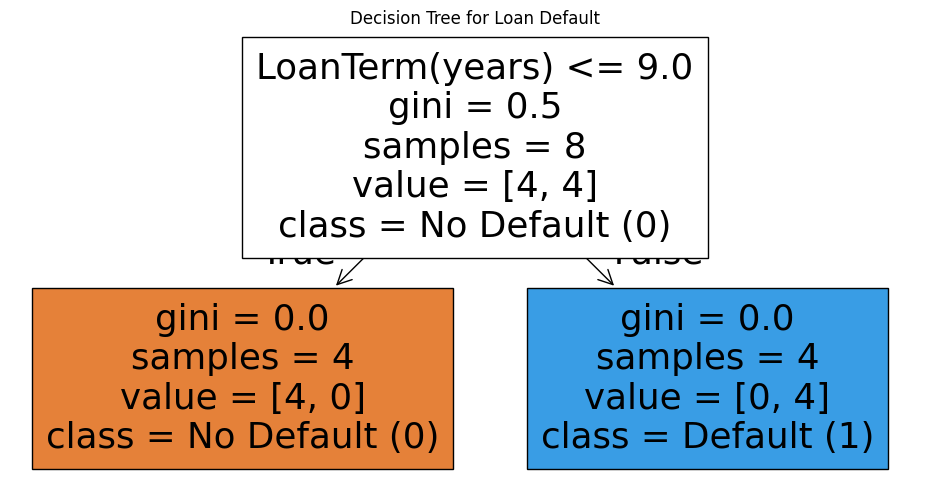


===== New Customer Comparison =====
KNN -> pred: 1  P(default): 1.0
DT  -> pred: 1  P(default): 1.0

--- NO SCALING (LoanAmount dominates) ---
   Age  AnnualIncome(lakhs)  CreditScore(300-900)  LoanAmount(lakhs)  \
1   45                 12.0                   680                 10   
5   42                 10.0                   660                  9   
7   48                 14.0                   650                 11   
8   38                  9.0                   700                  7   
3   50                 15.0                   640                 12   

   LoanTerm(years)  EmploymentType  loan   distance  
1               10               1     1  12.288206  
5               10               0     1  18.761663  
7               12               1     1  27.982137  
8                8               0     0  28.407745  
3               15               1     1  37.815341  
Prediction: 1

--- WITH SCALING (Balanced distance) ---
   Age  AnnualIncome(lakhs)  CreditScore(30

In [35]:
# @title
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

raw = """Age,AnnualIncome(lakhs),CreditScore(300-900),LoanAmount(lakhs),LoanTerm(years),EmploymentType,loan
28,6.5,720,5,5,Salaried,0
45,12,680,10,10,Self-Employed,1
35,8,750,6,7,Salaried,0
50,15,640,12,15,Self-Employed,1
30,7,710,5,5,Salaried,0
42,10,660,9,10,Salaried,1
26,5.5,730,4,4,Salaried,0
48,14,650,11,12,Self-Employed,1
38,9,700,7,8,Salaried,0
55,16,620,13,15,Self-Employed,1
"""
df = pd.read_csv(StringIO(raw))

# Encode EmploymentType (Salaried=0, Self-Employed=1) ----
df["EmploymentType"] = df["EmploymentType"].map({"Salaried": 0, "Self-Employed": 1})

# ---- 3) Split features/target ----
X = df.drop(columns=["loan"])
y = df["loan"]

# ---- 3) Basic grouped statistics (optional but useful) ----
print("\nGrouped means by loan (0=no default, 1=default):")
print(df.groupby("loan").mean(numeric_only=True).round(2))

print("\nCounts by loan class:")
print(df["loan"].value_counts())

# Scatter plots: feature vs loan ----
scatter_cols = [
    ("CreditScore(300-900)", "Credit Score (300-900)"),
    ("LoanAmount(lakhs)", "Loan Amount (lakhs)"),
    ("LoanTerm(years)", "Loan Term (years)"),
    ("Age", "Age"),
    ("AnnualIncome(lakhs)", "Annual Income (lakhs)")
]

for col, xlabel in scatter_cols:
    plt.figure()
    plt.scatter(df[col], df["loan"])
    plt.xlabel(xlabel)
    plt.ylabel("Loan Default (1=Yes, 0=No)")
    plt.title(f"{xlabel} vs Loan Default")
    plt.grid(True)
    plt.show()

# Boxplots: feature distribution by loan class ----
numeric_cols = ["CreditScore(300-900)", "LoanAmount(lakhs)", "LoanTerm(years)", "Age", "AnnualIncome(lakhs)"]

for col in numeric_cols:
    plt.figure()
    data0 = df[df["loan"] == 0][col].values
    data1 = df[df["loan"] == 1][col].values
    plt.boxplot([data0, data1], labels=["No Default (0)", "Default (1)"])
    plt.title(f"Boxplot of {col} by Loan Default")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# EmploymentType counts by loan class (bar chart) ----
emp_tab = df.groupby(["EmploymentType", "loan"]).size().unstack(fill_value=0)

plt.figure()
ax = emp_tab.plot(kind="bar")   # creates its own figure, but that's fine
plt.title("Employment Type counts by Loan Class")
plt.xlabel("EmploymentType (0=Salaried, 1=Self-Employed)")
plt.ylabel("Count")
plt.grid(axis="y")
plt.legend(title="loan")
plt.show()

# Correlation heatmap (matplotlib only) ----
corr_cols = numeric_cols + ["EmploymentType", "loan"]
corr = df[corr_cols].corr()

plt.figure(figsize=(7, 6))
plt.title("Correlation Matrix (numeric features)")
im = plt.imshow(corr, interpolation="nearest", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

print("\nCorrelation with target (loan):")
print(corr["loan"].sort_values(ascending=False).round(3))

# Identify high-risk customers.
  # Based on EDA, folks the high risk customers tend to match the following :
  # Credit Score < 680 → High default risk
  # Loan Amount above 9lacs
  # Loan Term above >= 10 years
  # Age > 40+
  # More Self Employed Group


# What patterns lead to loan default?
   #High-risk customers are older, have lower credit scores,
   #higher loan amounts, and longer loan terms.


# How do credit score and income influence predictions?
  # Higher credit score leads to Lower default probability
  # Generally High Annual Income usually mean less default.
  # However in the dataset, high income group people represent both in default / nondefault group.
  # hence they have moderate influence


# Stratify keeps class balance similar in train/test (important for tiny datasets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 4) Build Pipeline: Scaling + KNN ----
# Scaling is essential: different units (credit score vs loan amount) otherwise distort distances
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=1, metric="euclidean"))
])

# ---- 5) Train ----
knn_pipeline.fit(X_train, y_train)

# ---- 6) Evaluate ----
y_pred = knn_pipeline.predict(X_test)


print("KNN (k=3) Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




# Predict for a new customer (example) ----
# Format must match training columns exactly:
new_customer = pd.DataFrame([{
    "Age": 40,
    "AnnualIncome(lakhs)": 11,
    "CreditScore(300-900)": 500,
    "LoanAmount(lakhs)": 20,
    "LoanTerm(years)": 20,
    "EmploymentType": 1  # Self-Employed
}])

prediction = knn_pipeline.predict(new_customer)[0]
proba = knn_pipeline.predict_proba(new_customer)[0]  # [P(no default), P(default)]
print("  High Risk Category")
print("  Predicted loan(default=1):", prediction)
print("  Probabilities [P(0), P(1)]:", proba)

# Predict for a new customer (example) ----
new_customer = pd.DataFrame([{
    "Age": 40,
    "AnnualIncome(lakhs)": 11,
    "CreditScore(300-900)": 900,
    "LoanAmount(lakhs)": 4,
    "LoanTerm(years)": 5,
    "EmploymentType": 0  # Self-Employed
}])

prediction = knn_pipeline.predict(new_customer)[0]
proba = knn_pipeline.predict_proba(new_customer)[0]  # [P(no default), P(default)]
print("  Medium Risk Category")
print("  Predicted loan(default=1):", prediction)
print("  Probabilities [P(0), P(1)]:", proba)

#Suggested banking policies based on model output
    # When the probability of prediction is > 0.7, make it High Risk. Reject the loan request
    # When the probability of prediction is < 0.3, make it Low Risk. Accept the loan request
    # Else Demand Collaterals.

# Compare KNN with Decision Trees for this problem


from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
def evaluate_model(name, model, X_test, y_test):
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    print(f"\n===== {name} =====")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, pred, digits=3))

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=2
)
dt_model.fit(X_train, y_train)
evaluate_model("KNN", knn_pipeline, X_test, y_test)
evaluate_model("Decision Tree", dt_model, X_test, y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=cv, scoring="accuracy")
dt_cv_scores = cross_val_score(dt_model, X, y, cv=cv, scoring="accuracy")
feature_names = list(X.columns)

print("\n===== Cross-Validation Accuracy (5-fold) =====")
print("KNN scores:", knn_cv_scores, " | mean =", round(knn_cv_scores.mean(), 3))
print("DT  scores:", dt_cv_scores,  " | mean =", round(dt_cv_scores.mean(), 3))
print("\n===== Decision Tree Rules (text) =====")
tree_rules = export_text(dt_model, feature_names=feature_names)
print(tree_rules)

# Plot the tree (one figure)
plt.figure(figsize=(12, 6))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=["No Default (0)", "Default (1)"],
    filled=True
)
plt.title("Decision Tree for Loan Default")
plt.show()

new_customer = pd.DataFrame([{
    "Age": 40,
    "AnnualIncome(lakhs)": 11,
    "CreditScore(300-900)": 675,
    "LoanAmount(lakhs)": 9,
    "LoanTerm(years)": 10,
    "EmploymentType": 1
}])

knn_pred = knn_pipeline.predict(new_customer)[0]
knn_prob = knn_pipeline.predict_proba(new_customer)[0][1]  # P(default)

dt_pred = dt_model.predict(new_customer)[0]
dt_prob = dt_model.predict_proba(new_customer)[0][1]    # P(default)

print("\n===== New Customer Comparison =====")
print("KNN -> pred:", knn_pred, " P(default):", round(knn_prob, 3))
print("DT  -> pred:", dt_pred,  " P(default):", round(dt_prob, 3))

# KNN vs DT comparison
# KNN needs scaling, DT is not
# DT gives explainability or decision rules, KNN is not.
# DT considers only Loan Duration Years as the separation is clear and enough mathematically.
# This does not imply loan tenure alone determines default risk, but rather that the dataset is small and exhibits a strong correlation between tenure and default.
# Seems KNN processes the features simultaneously, however DT stops once the pure rule is formed.



#What happens if LoanAmount dominates distance calculation in KNN?

new_customer = pd.DataFrame([{
    "Age": 40,
    "AnnualIncome(lakhs)": 11,
    "CreditScore(300-900)": 675,
    "LoanAmount(lakhs)": 20,
    "LoanTerm(years)": 10,
    "EmploymentType": 1
}])

# -----------------------------
# 3. KNN WITHOUT scaling
# -----------------------------
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X, y)

dist_raw, idx_raw = knn_raw.kneighbors(new_customer)
neighbors_raw = X.iloc[idx_raw[0]].copy()
neighbors_raw["loan"] = y.iloc[idx_raw[0]].values
neighbors_raw["distance"] = dist_raw[0]

print("\n--- NO SCALING (LoanAmount dominates) ---")
print(neighbors_raw)
print("Prediction:", knn_raw.predict(new_customer)[0] )

# -----------------------------
# 4. KNN WITH scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
new_scaled = scaler.transform(new_customer)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_scaled, y)

dist_scaled, idx_scaled = knn_scaled.kneighbors(new_scaled)
neighbors_scaled = X.iloc[idx_scaled[0]].copy()
neighbors_scaled["loan"] = y.iloc[idx_scaled[0]].values
neighbors_scaled["distance"] = dist_scaled[0]

print("\n--- WITH SCALING (Balanced distance) ---")
print(neighbors_scaled)
print("Prediction:", knn_scaled.predict(new_scaled)[0])

# -----------------------------
# 5. Distance contribution proof
# -----------------------------
sample_neighbor = X.iloc[0]

raw_contrib = (new_customer.iloc[0] - sample_neighbor) ** 2
print("\nSquared distance contribution (NO scaling):")
print(raw_contrib.sort_values(ascending=False))

scaled_new = pd.Series(new_scaled[0], index=X.columns)
scaled_neighbor = pd.Series(
    scaler.transform(sample_neighbor.to_frame().T)[0],
    index=X.columns
)
scaled_contrib = (scaled_new - scaled_neighbor) ** 2
print("\nSquared distance contribution (WITH scaling):")
print(scaled_contrib.sort_values(ascending=False))

#Squared distance contribution (NO scaling):
#CreditScore(300-900)    2025.00
#LoanAmount(lakhs)        225.00
#Age                      144.00
#LoanTerm(years)           25.00
#AnnualIncome(lakhs)       20.25
#EmploymentType             1.00
#Name: 0, dtype: float64

#Squared distance contribution (WITH scaling):
#LoanAmount(lakhs)       24.038462
#EmploymentType           4.166667
#LoanTerm(years)          1.725328
#Age                      1.625099
#AnnualIncome(lakhs)      1.599526
#CreditScore(300-900)     1.231752
#dtype: float64

# Average distance between the parameters widens WITHOUT scaling.  This affects the balance.
